[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.3%20%EB%AA%A8%EB%A9%98%ED%85%80%20%EC%A7%80%ED%91%9C%20RSI-output.ipynb)

# RSI(Relative Strength Index)

* 모멘텀 : 운동량 (運動量, 영어: momentum)은 물리학 특히, 뉴턴 역학에서 물체의 질량과 속도의 곱으로 나타내는 물리량이다


상대강도지수(相對强度指數, 영어: relative strength index, RSI)는 주식, 선물, 옵션 등의 기술적 분석에 사용되는 보조 지표이다. RSI는 가격의 상승압력과 하락압력 간의 상대적인 강도를 나타낸다. 1978년 미국의 월레스 와일더(J. Welles Wilder Jr.)가 개발했다.


RSI는 일정 기간 동안 주가가 전일 가격에 비해 상승한 변화량과 하락한 변화량의 평균값을 구하여, 상승한 변화량이 크면 과매수로, 하락한 변화량이 크면 과매도로 판단하는 방식이다.

계산 방법은 다음과 같다. 주어진 기간의 모든 날의 주가에 대해서

* 가격이 전일 가격보다 상승한 날의 상승분은 U(up) 값이라고 하고,
* 가격이 전일 가격보다 하락한 날의 하락분은 D(down) 값이라고 한다.
* U값과 D값의 평균값을 구하여 그것을 각각 AU(average ups)와 AD(average downs)라 한다.
*  AU를 AD값으로 나눈 것을 RS(relative strength) 값이라고 한다. RS 값이 크다는 것은 일정 기간 하락한 폭보다 상승한 폭이 크다는 것을 의미한다.
다음 계산에 의하여 RSI 값을 구한다.


* RSI 계산 공식 :
    * RS = AU / AD
    * RSI = RS / (1 + RS) = AU / (AU + AD)

대체로 이 값은 백분율로 나타낸다.

이 지표의 파라메터로는 기간을 며칠 동안으로 할 것인가가 있다. Welles Wilder는 14일을 사용할 것을 권유했다. 대체로 사용되는 값은 9일, 14 ~ 15일, 25 ~ 28일 등이다.

RSI 그래프는 이동평균선을 함께 나타내는 것이 보통이며, 이동평균선을 며칠선으로 할 것인가 역시 파라메터로 주어진다. RSI를 15일에 대하여 구하고 5일 이동평균선을 함께 표시하는 경우 그래프에 (15, 5)라고 표시해주는 것이 일반적이다.

유사한 지표로는 스토캐스틱이 있다. RSI 그래프의 형태는 fast stochastic과 비슷하게 나온다.


출처 : https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C)

* 지표의 파라메터를 14일로 했을 때
    * RSI = 14일의 상승폭 합계 / (14일의 상승폭 합계 + 14일의 하락폭 합)
    * 수식에 따라 RSI 는 0~1 사이의 값 만을 가지게 됩니다.
    * 만일 14일 동안 매일 상승하게 되면 1이 나오고 14일 동안 매일 하락하게 되면 0이 나옵니다.
    * 보통 0.7이 과열, 0.3이 침체로 봅니다.

* https://web.archive.org/web/20180330212602/http://traderk10.tistory.com/119

## RSI 계산 공식
1. U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
4. AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
5. RS = AU / AD
6. RSI = AU / (AU+AD) = RS / (1+RS)
7. RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

### 라이브러리 로드

In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

## 개별종목 일별시세 가져오기

In [3]:
! pip install PyMySQL

     |████████████████████████████████| 43 kB 2.2 MB/s 


In [4]:
import pymysql.cursors

In [5]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [6]:
connection

In [7]:
cursor = connection.cursor()

In [8]:
cursor

In [9]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 삼성전자의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '005930'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-08-01'
"""  

In [10]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

145

In [11]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [12]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('38750.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('39400.000'),
  'L_PRC': Decimal('38550.000'),
  'O_PRC': Decimal('39400.000'),
  'STK_CD': '005930',
  'VOL': Decimal('7847664.000')},
 {'C_PRC': Decimal('37600.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('38550.000'),
  'L_PRC': Decimal('37450.000'),
  'O_PRC': Decimal('38300.000'),
  'STK_CD': '005930',
  'VOL': Decimal('12471493.000')},
 {'C_PRC': Decimal('37450.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('37600.000'),
  'L_PRC': Decimal('36850.000'),
  'O_PRC': Decimal('37450.000'),
  'STK_CD': '005930',
  'VOL': Decimal('14108958.000')},
 {'C_PRC': Decimal('38750.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('38900.000'),
  'L_PRC': Decimal('37800.000'),
  'O_PRC': Decimal('38000.000'),
  'STK_CD': '005930',
  'VOL': Decimal('12748997.000')},
 {'C_PRC': Decimal('38100.000'),
  'DT': datetime.date(2019, 1, 8),
  'H_PRC': Decimal('39200.000'),
  'L

In [13]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [14]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,005930,2019-01-02,38750.000,39400.000,39400.000,38550.000,7847664.000
1,005930,2019-01-03,37600.000,38300.000,38550.000,37450.000,12471493.000
2,005930,2019-01-04,37450.000,37450.000,37600.000,36850.000,14108958.000
3,005930,2019-01-07,38750.000,38000.000,38900.000,37800.000,12748997.000
4,005930,2019-01-08,38100.000,38000.000,39200.000,37950.000,12756554.000
...,...,...,...,...,...,...,...
140,005930,2019-07-26,47150.000,46650.000,47150.000,46550.000,7873886.000
141,005930,2019-07-29,46100.000,46800.000,47050.000,46000.000,6856846.000
142,005930,2019-07-30,46550.000,46300.000,46850.000,46300.000,5551014.000
143,005930,2019-07-31,45350.000,46200.000,46600.000,45000.000,12872916.000


In [15]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  145 non-null    object
 1   DT      145 non-null    object
 2   C_PRC   145 non-null    object
 3   O_PRC   145 non-null    object
 4   H_PRC   145 non-null    object
 5   L_PRC   145 non-null    object
 6   VOL     145 non-null    object
dtypes: object(7)
memory usage: 8.1+ KB


In [16]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [17]:
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

In [18]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  145 non-null    object        
 1   DT      145 non-null    datetime64[ns]
 2   C_PRC   145 non-null    int64         
 3   O_PRC   145 non-null    int64         
 4   H_PRC   145 non-null    int64         
 5   L_PRC   145 non-null    int64         
 6   VOL     145 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.1+ KB


## 전일 대비 상승, 하락 변수 생성하기

In [19]:
# diff() : 함수는 윗줄 (하루전) 데이터와 아래줄 데이터(현재)의 차를 계산

df["diff"] = df["C_PRC"].diff()

In [20]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로 
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    # 전날주가 - 오늘주가가 0 초과
    if diff > 0:
        # 상승치를 ups에 대입
        ups = diff
    elif diff < 0: # 전날주가 - 오늘주가가 0 미만
        # 하락치의 절대값 (abs)를 downs 에 대입
        downs = abs(diff)
    # ups와 downs 를 Series(DataFrame 칸) 으로 만들어서 리턴    
    return pd.Series([ups, downs])

In [21]:
#  df["diff"] 컬럼 데이터에 UD 함수를 실행해서 상승분과 하락분을 계산하고
# 상승분은 U, 하락분은 D 컬럼에 저장
df[["U", "D"]] = df["diff"].apply(UD)

In [22]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D
0,005930,2019-01-02,38750,39400,39400,38550,7847664,NaN,0.0,0.0
1,005930,2019-01-03,37600,38300,38550,37450,12471493,-1150.0,0.0,1150.0
2,005930,2019-01-04,37450,37450,37600,36850,14108958,-150.0,0.0,150.0
3,005930,2019-01-07,38750,38000,38900,37800,12748997,1300.0,1300.0,0.0
4,005930,2019-01-08,38100,38000,39200,37950,12756554,-650.0,0.0,650.0
...,...,...,...,...,...,...,...,...,...,...
140,005930,2019-07-26,47150,46650,47150,46550,7873886,-50.0,0.0,50.0
141,005930,2019-07-29,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0
142,005930,2019-07-30,46550,46300,46850,46300,5551014,450.0,450.0,0.0
143,005930,2019-07-31,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0


## AU / AD 변수 생성하기
* AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
* AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)

In [23]:
# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
df["AU"] = df["U"].rolling(14).mean()

In [24]:
# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AD"] = df["D"].rolling(14).mean()

In [25]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD
140,005930,2019-07-26,47150,46650,47150,46550,7873886,-50.0,0.0,50.0,321.428571,125.000000
141,005930,2019-07-29,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0,271.428571,200.000000
142,005930,2019-07-30,46550,46300,46850,46300,5551014,450.0,450.0,0.0,271.428571,200.000000
143,005930,2019-07-31,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0,225.000000,285.714286
144,005930,2019-08-01,45200,44900,45500,44850,7811181,-150.0,0.0,150.0,217.857143,296.428571


## RS, RSI 만들기
* RS = AU / AD
* RSI = AU / (AU+AD) = RS / (1+RS)

In [26]:
# RS = AU(일정기간(N일,보통14일) 동안의 U의 평균값(average ups) ) / AD (일정기간(N일,보통14일) 동안의 D의 평균값(average downs))
# 
df["RS"] = df["AU"] / df["AD"]

In [27]:
#AU / (AU+AD) = RS / (1+RS)
df["RSI"] = df["RS"] / (1 + df["RS"])

In [28]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI
140,005930,2019-07-26,47150,46650,47150,46550,7873886,-50.0,0.0,50.0,321.428571,125.000000,2.571429,0.720000
141,005930,2019-07-29,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0,271.428571,200.000000,1.357143,0.575758
142,005930,2019-07-30,46550,46300,46850,46300,5551014,450.0,450.0,0.0,271.428571,200.000000,1.357143,0.575758
143,005930,2019-07-31,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0,225.000000,285.714286,0.787500,0.440559
144,005930,2019-08-01,45200,44900,45500,44850,7811181,-150.0,0.0,150.0,217.857143,296.428571,0.734940,0.423611


## RSI signal 만들기
* RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

In [29]:
# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()

In [30]:
df.tail()

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal
140,005930,2019-07-26,47150,46650,47150,46550,7873886,-50.0,0.0,50.0,321.428571,125.000000,2.571429,0.720000,0.595277
141,005930,2019-07-29,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0,271.428571,200.000000,1.357143,0.575758,0.605651
142,005930,2019-07-30,46550,46300,46850,46300,5551014,450.0,450.0,0.0,271.428571,200.000000,1.357143,0.575758,0.607651
143,005930,2019-07-31,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0,225.000000,285.714286,0.787500,0.440559,0.574112
144,005930,2019-08-01,45200,44900,45500,44850,7811181,-150.0,0.0,150.0,217.857143,296.428571,0.734940,0.423611,0.556619


In [31]:
# DT 컬럼 (날짜) 를 인덱스로 설정
df = df.set_index("DT")

In [32]:
df.tail()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal
DT,,,,,,,,,,,,,,
2019-07-26,005930,47150,46650,47150,46550,7873886,-50.0,0.0,50.0,321.428571,125.000000,2.571429,0.720000,0.595277
2019-07-29,005930,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0,271.428571,200.000000,1.357143,0.575758,0.605651
2019-07-30,005930,46550,46300,46850,46300,5551014,450.0,450.0,0.0,271.428571,200.000000,1.357143,0.575758,0.607651
2019-07-31,005930,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0,225.000000,285.714286,0.787500,0.440559,0.574112
2019-08-01,005930,45200,44900,45500,44850,7811181,-150.0,0.0,150.0,217.857143,296.428571,0.734940,0.423611,0.556619



## RSI의 해석
1. RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
2. RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
3. RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
4. RSI가 시그널선을 상향돌파하면 단기적으로 매수세가 늘어나는 추세라고 판단합니다.
5. RSI가 시그널선을 하향돌파하면 단기적으로 매도세가 늘어나는 추세라고 판단합니다.


* [RSI (투자지표) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C))

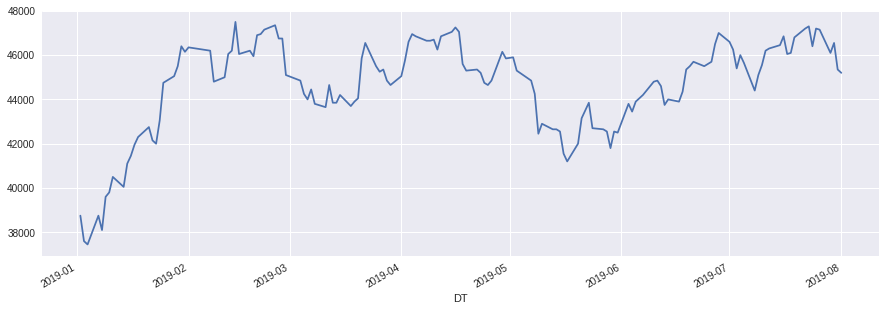

In [33]:
# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["C_PRC"].plot(figsize=(15, 5))

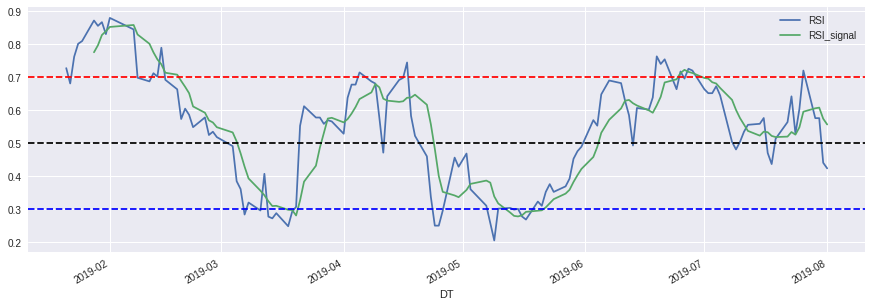

In [34]:
# 'RSI','RSI_signal' 을 시각화 합니다.
df[["RSI", "RSI_signal"]].plot(figsize=(15, 5))
# RSI 가 70퍼센트 지점에 빨강색 선 ->  RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
plt.axhline(0.7, c="r", ls="--")
# RSI 가 50 퍼센트 지점에 검정색 선 -> RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
plt.axhline(0.5, c="k", ls="--")
# RSI 가 30 퍼센트 지점에 파랑색 선 ->  RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
plt.axhline(0.3, c="b", ls="--")

## plotly를 통한 시각화 

### plotly.express 로 간단하게 시각화 하기

In [35]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

     |████████████████████████████████| 21.8 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [36]:
# plotly.express 로드하기
import plotly.express as px

In [37]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7

In [38]:
df.tail()

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
DT,,,,,,,,,,,,,,,,
2019-07-26,005930,47150,46650,47150,46550,7873886,-50.0,0.0,50.0,321.428571,125.000000,2.571429,0.720000,0.595277,0.3,0.7
2019-07-29,005930,46100,46800,47050,46000,6856846,-1050.0,0.0,1050.0,271.428571,200.000000,1.357143,0.575758,0.605651,0.3,0.7
2019-07-30,005930,46550,46300,46850,46300,5551014,450.0,450.0,0.0,271.428571,200.000000,1.357143,0.575758,0.607651,0.3,0.7
2019-07-31,005930,45350,46200,46600,45000,12872916,-1200.0,0.0,1200.0,225.000000,285.714286,0.787500,0.440559,0.574112,0.3,0.7
2019-08-01,005930,45200,44900,45500,44850,7811181,-150.0,0.0,150.0,217.857143,296.428571,0.734940,0.423611,0.556619,0.3,0.7


In [39]:
# RSI, RSI_signal, s3, s7 을 선그래프로 그림
px.line(df[["RSI", "RSI_signal", "s3", "s7"]])

### graph_objs 와 subplots 을 사용한 시각화

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3 줄 1칸짜리 그래프 생성 
fig = make_subplots(rows=3, 
                    cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    # 각 줄의 제목
                    subplot_titles=('<b>삼성전자</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))


fig.add_trace(    # 봉차트 추가
                   go.Candlestick(
                        x=df.index,              #날짜
                        open=df['O_PRC'],      # 시가
                        high=df['H_PRC'],     #고가
                        low=df['L_PRC'],       #저가
                        close=df['C_PRC'],   # 종가
                        increasing_line_color='red', # 상승봉의 색 설정
                        decreasing_line_color='blue' # 하락봉의 색 설정
                  ), 
                  row=1, col=1) # 1번째줄 1번째 칸에 추가

fig.add_trace(
                    # 선그래프 추가
                     go.Scatter(
                         x=df.index, #날짜
                         y=df['RSI'], # RSI
                         line=dict(color='blue'), #파란색
                         name='RSI'), # 범례
                row=3, col=1) # 3번째줄 1번째 칸에 추가

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['RSI_signal'],
                         line=dict(color='red'),
                         name='RSI_signal'), row=3, col=1)
#선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s3"],#s3 
                         line=dict(color='red',dash='dash'), #빨강색
                         name='Low bound'),#범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s7"],#s3
                         line=dict(color='blue',dash='dash'),#파랑색
                         name='High bound'), #범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 그래프 가로 1200 세로 800 기간 슬라이더 추가
fig.update_layout(width=1200, height=800, xaxis_rangeslider_visible=True)

fig.show()